# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [5]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [21]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "hongduc4"
kaggle_key = "c3385b7e575545f16a8cd8d4c14f1956"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

## Step 2: Download the Kaggle dataset using the kaggle python library

In [9]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 82.5MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [10]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [12]:
train = pd.read_csv('train.csv',parse_dates = ['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [14]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv',parse_dates = ['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [15]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv',parse_dates = ['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

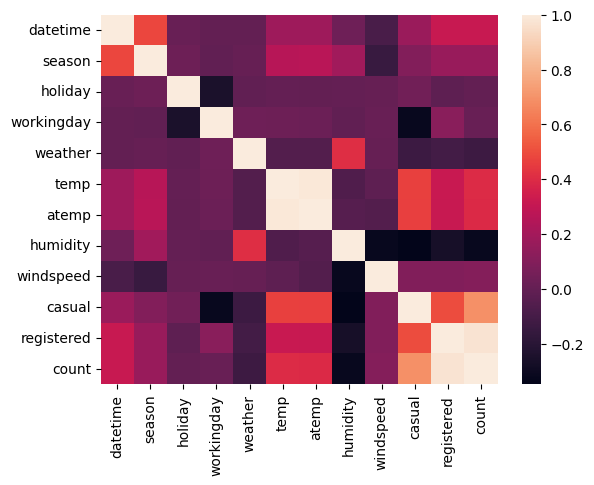

In [17]:
sns.heatmap(train.corr());

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [19]:
predictor = TabularPredictor(label='count',eval_metric = 'root_mean_squared_error',
                            learner_kwargs = {"ignored_columns": ['registered', 'casual']}).fit(train_data = train,
                                                                          time_limit =600,
                                                                          presets = 'best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240627_150119"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Dec 19 13:14:11 UTC 2023
CPU Count:          4
Memory Avail:       29.49 GB / 31.36 GB (94.0%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets o

(_ray_fit pid=2091) [1000]	valid_set's rmse: 132.725
(_ray_fit pid=2209) [1000]	valid_set's rmse: 128.154 [repeated 6x across cluster]
(_ray_fit pid=2238) [2000]	valid_set's rmse: 134.443 [repeated 4x across cluster]
(_ray_fit pid=2297) [2000]	valid_set's rmse: 138.865 [repeated 10x across cluster]
(_ray_fit pid=2238) [7000]	valid_set's rmse: 132.416 [repeated 9x across cluster]
(_ray_fit pid=2266) [8000]	valid_set's rmse: 135.261 [repeated 7x across cluster]


(_dystack pid=2021) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2021) 	37.88s	 = Training   runtime
(_dystack pid=2021) 	5.58s	 = Validation runtime
(_dystack pid=2021) Fitting model: LightGBM_BAG_L1 ... Training model for up to 56.43s of the 106.4s of remaining time.
(_dystack pid=2021) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.03%)


(_ray_fit pid=2330) [1000]	valid_set's rmse: 135.098
(_ray_fit pid=2329) [1000]	valid_set's rmse: 129.285
(_ray_fit pid=2448) [1000]	valid_set's rmse: 124.896 [repeated 2x across cluster]


(_dystack pid=2021) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2021) 	18.16s	 = Training   runtime
(_dystack pid=2021) 	1.07s	 = Validation runtime
(_dystack pid=2021) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 34.8s of the 84.78s of remaining time.
(_dystack pid=2021) 	-119.5485	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2021) 	6.1s	 = Training   runtime
(_dystack pid=2021) 	0.6s	 = Validation runtime
(_dystack pid=2021) Fitting model: CatBoost_BAG_L1 ... Training model for up to 27.63s of the 77.6s of remaining time.
(_dystack pid=2021) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_ray_fit pid=2578) 	Ran out of time, early stopping on iteration 1646.
(_ray_fit pid=2715) 	Ran out of time, early stopping on iteration 1590. [repeated 2x across cluster]
(_dystack pid=2021) 	-132.5672	 = Validation score   (-root_mean_squared_e

(_ray_fit pid=2890) [1000]	valid_set's rmse: 69.8095 [repeated 4x across cluster]
(_ray_fit pid=3009) [1000]	valid_set's rmse: 76.6574 [repeated 4x across cluster]


(_dystack pid=2021) 	-74.1979	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2021) 	21.28s	 = Training   runtime
(_dystack pid=2021) 	1.87s	 = Validation runtime
(_dystack pid=2021) Fitting model: LightGBM_BAG_L2 ... Training model for up to 23.85s of the 23.8s of remaining time.
(_dystack pid=2021) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_ray_fit pid=2790) 	Ran out of time, early stopping on iteration 1742. [repeated 3x across cluster]
(_dystack pid=2021) 	-68.2603	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2021) 	14.46s	 = Training   runtime
(_dystack pid=2021) 	0.22s	 = Validation runtime
(_dystack pid=2021) Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 5.84s of the 5.79s of remaining time.
(_dystack pid=2021) 	-67.174	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2021) 	14.43s	 = Training   runtime
(_dystack pid=2021

### Review AutoGluon's training run with ranking of models that did the best.

In [22]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.694933  root_mean_squared_error      11.505403  312.649673                0.000978           0.067458            3       True         17
1   RandomForestMSE_BAG_L2  -53.369370  root_mean_squared_error      10.581081  291.160837                0.641019          18.844574            2       True         13
2     ExtraTreesMSE_BAG_L2  -53.677717  root_mean_squared_error      10.581588  277.603074                0.641526           5.286811            2       True         15
3          LightGBM_BAG_L2  -54.888458  root_mean_squared_error      10.221882  288.450830                0.281819          16.134567            2       True         12
4          CatBoost_BAG_L2  -55.699463  root_mean_squared_error      10.033369  314.718912   

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.632965401

### Create predictions from test dataset

<Axes: xlabel='model'>

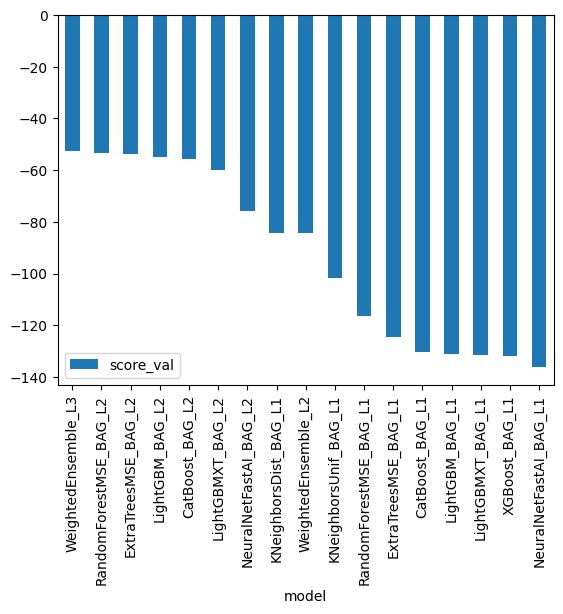

In [23]:
predictor.leaderboard(silent = True).plot(kind = 'bar',x = 'model',y = 'score_val')

In [24]:
predictor.get_model_names()

/tmp/ipykernel_34/997680543.py:1: DeprecationWarning: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead. This will raise an error in the future!
  predictor.get_model_names()


['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'LightGBMXT_BAG_L1',
 'LightGBM_BAG_L1',
 'RandomForestMSE_BAG_L1',
 'CatBoost_BAG_L1',
 'ExtraTreesMSE_BAG_L1',
 'NeuralNetFastAI_BAG_L1',
 'XGBoost_BAG_L1',
 'WeightedEnsemble_L2',
 'LightGBMXT_BAG_L2',
 'LightGBM_BAG_L2',
 'RandomForestMSE_BAG_L2',
 'CatBoost_BAG_L2',
 'ExtraTreesMSE_BAG_L2',
 'NeuralNetFastAI_BAG_L2',
 'WeightedEnsemble_L3']

In [25]:
predictions = predictor.predict(test)
predictions.head()

0    23.128666
1    43.132874
2    47.061695
3    48.886185
4    51.229744
Name: count, dtype: float32

In [26]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.201073
std        89.805458
min         3.054724
25%        20.925835
50%        62.264679
75%       169.202850
max       365.169006
Name: count, dtype: float64

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [27]:
# How many negative values do we have?
predictions[predictions < 0].count()

0

In [28]:
# Set them to zero
for a,b in enumerate(predictions):
    if b < 0:
        predictions[a] = 0

In [29]:
predictions.describe()

count    6493.000000
mean      100.201073
std        89.805458
min         3.054724
25%        20.925835
50%        62.264679
75%       169.202850
max       365.169006
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [30]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [31]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 552kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [35]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-06-27 15:16:50  first raw submission  complete  1.80885      1.80885       


#### Initial score of `1.80885`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

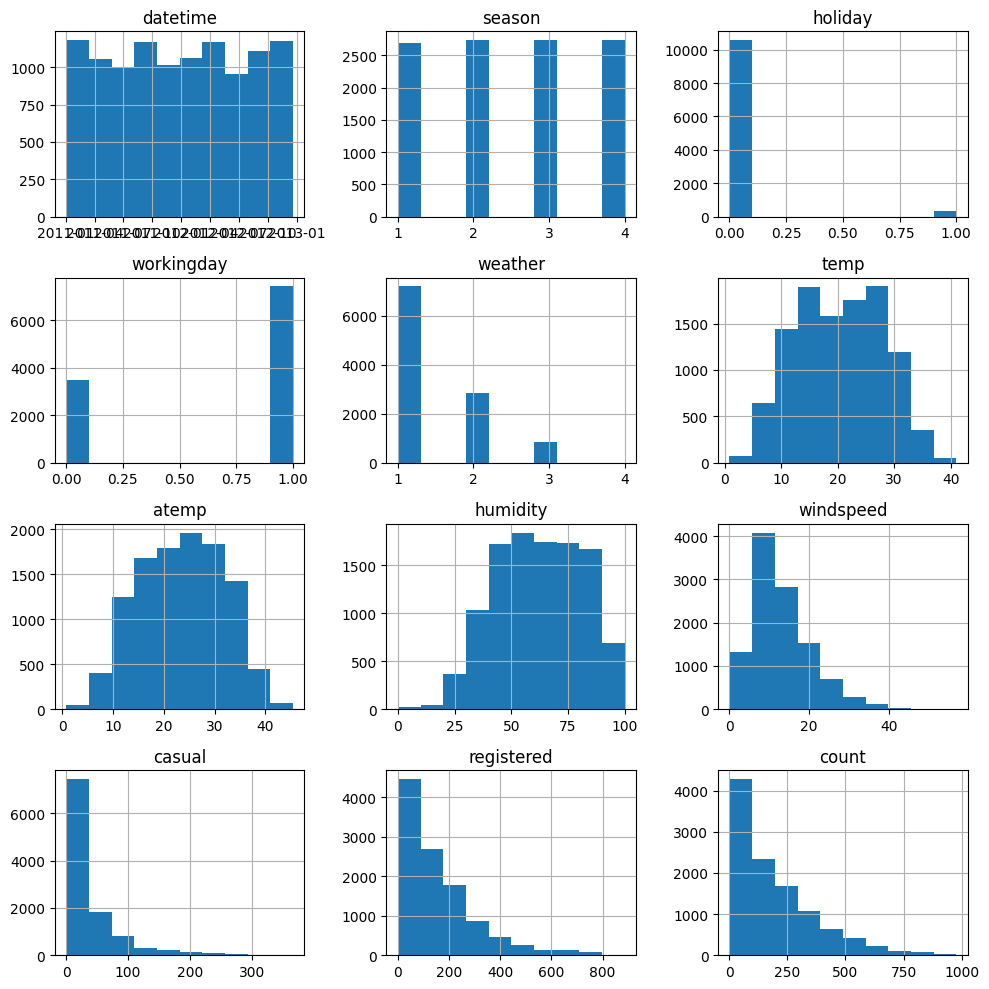

In [37]:
train.hist(figsize = [10,10])
plt.tight_layout()
plt.show()

In [38]:
# create a new feature
train['month']= train['datetime'].dt.month
train['day']  = train['datetime'].dt.day
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [39]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [40]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1


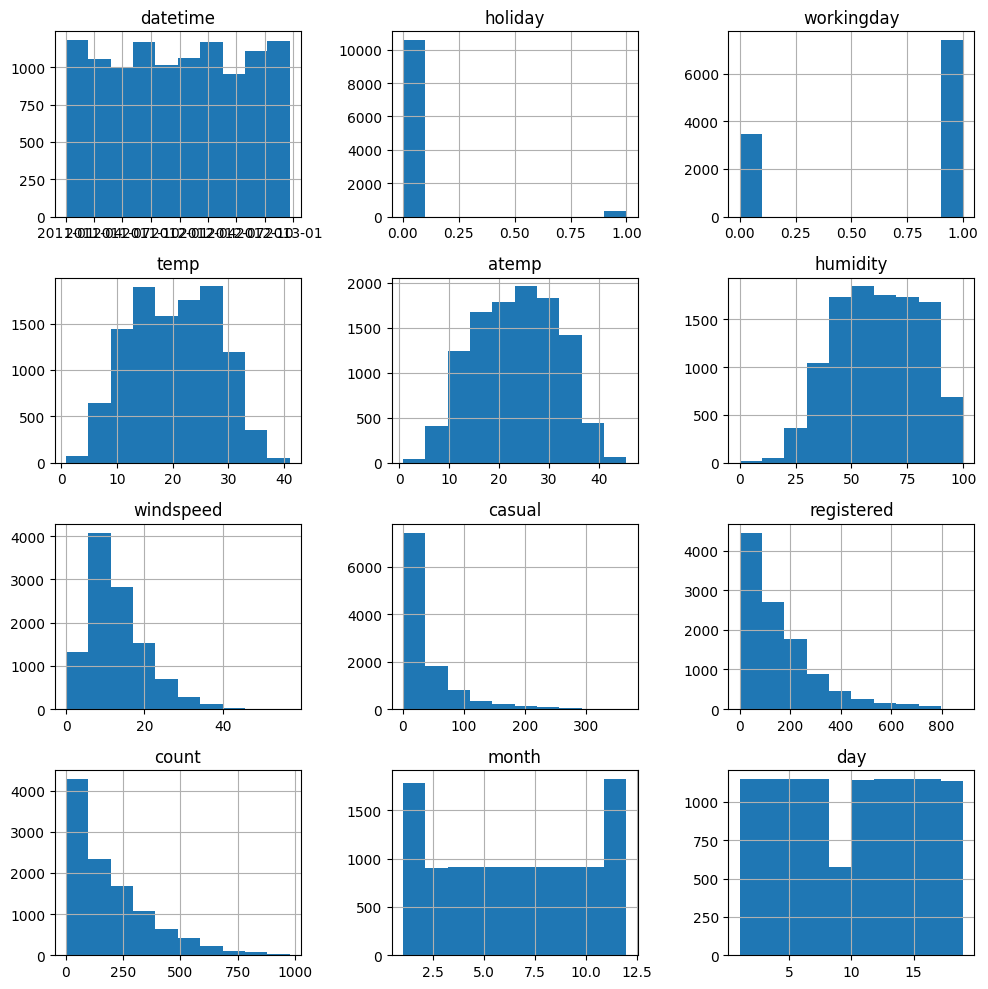

In [41]:
train.hist(figsize = [10,10])
plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [43]:
predictor_new_features = TabularPredictor(label = 'count',eval_metric = 'root_mean_squared_error',
                                         learner_kwargs = {"ignored_columns": ["casual", "registered"]}).fit(train_data=train,
                                                                          time_limit =600,
                                                                    presets = 'best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240627_154000"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Dec 19 13:14:11 UTC 2023
CPU Count:          4
Memory Avail:       27.70 GB / 31.36 GB (88.3%)
Disk Space Avail:   18.21 GB / 19.52 GB (93.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets o

In [44]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.655874  root_mean_squared_error      10.815716  335.443857                0.000696           0.039860            3       True         14
1   RandomForestMSE_BAG_L2  -52.956856  root_mean_squared_error      10.303070  280.869143                0.634094          18.373042            2       True         12
2          LightGBM_BAG_L2  -54.723291  root_mean_squared_error      10.054474  277.430897                0.385498          14.934797            2       True         11
3          CatBoost_BAG_L2  -55.626566  root_mean_squared_error       9.795428  302.096158                0.126451          39.600058            2       True         13
4        LightGBMXT_BAG_L2  -60.911557  root_mean_squared_error      13.464342  295.649150   

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.63296540177245,
  'KNeighborsDist_BAG_L1': -84.16949269107224,
  'LightGBMXT_BAG_L1': -131.04914531227948,
  'LightGBM_BAG_L1': -130.6695576989031,
  'RandomForestMSE_BAG_L1': -116.6

In [45]:
# Remember to set all negative values to zero
a = predictor_new_features.predict(test,model = 'WeightedEnsemble_L2')
a.describe()

count    6493.000000
mean      113.056877
std       100.272194
min         3.424214
25%        23.825022
50%        74.273811
75%       191.522430
max       342.462982
Name: count, dtype: float64

In [46]:
# Set them to zero
for i,b in enumerate(a):
    if b < 0:
        a[i] = 0
a.describe()

count    6493.000000
mean      113.056877
std       100.272194
min         3.424214
25%        23.825022
50%        74.273811
75%       191.522430
max       342.462982
Name: count, dtype: float64

In [47]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = a
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [48]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 547kB/s]
Successfully submitted to Bike Sharing Demand

In [49]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-06-27 15:51:18  new features          complete  1.84672      1.84672       
submission.csv               2024-06-27 15:16:50  first raw submission  complete  1.80885      1.80885       


#### New Score of `1.84672`

<Axes: ylabel='model'>

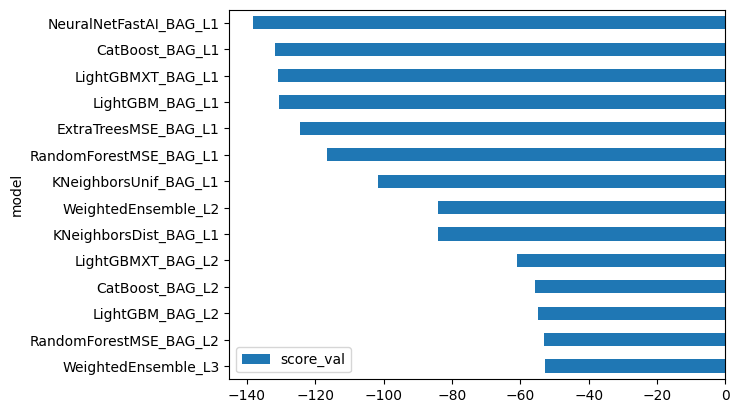

In [50]:
predictor_new_features.leaderboard(silent = True).plot(kind = 'barh',x = 'model',y = 'score_val')

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [52]:
predictor_new_hpo = TabularPredictor(label = 'count',eval_metric = 'accuracy',
                                    problem_type = 'multiclass',
                                    learner_kwargs = {"ignored_columns": ["casual", "registered"]}).fit(train_data = train,
                                                                          time_limit =320,presets = 'best_quality',hyperparameters ={'GBM':[{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},'GBMLarge']},
                                                                                                       hyperparameter_tune_kwargs = {
                                                                                                           'num_trials': 100,
                                                                                                           'search_strategy': 'random','scheduler':'local'})

No path specified. Models will be saved in: "AutogluonModels/ag-20240627_155255"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Dec 19 13:14:11 UTC 2023
CPU Count:          4
Memory Avail:       28.34 GB / 31.36 GB (90.4%)
Disk Space Avail:   17.22 GB / 19.52 GB (88.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets o

In [53]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  LightGBMLarge_BAG_L1   0.004274    accuracy       1.535467  17.679069                1.535467          17.679069            1       True          1
1   WeightedEnsemble_L2   0.004274    accuracy       1.569198  17.991972                0.033731           0.312902            2       True          2
Number of models trained: 2
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_LGB'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])             : 2 | ['season', 'weather']
('float', [])                : 3 | ['temp', 'atemp', 'windspeed']
('int', [])                  : 3 | ['humidity', 'month', 'day']
('int', ['bool'])            : 2 | ['holiday', 'working

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMLarge_BAG_L1': 0.004274298457535774,
  'WeightedEnsemble_L2': 0.004274298457535774},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBMLarge_BAG_L1': ['LightGBMLarge_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBMLarge_BAG_L1': 17.67906928062439,
  'WeightedEnsemble_L2': 0.31290245056152344},
 'model_pred_times': {'LightGBMLarge_BAG_L1': 1.5354669094085693,
  'WeightedEnsemble_L2': 0.03373074531555176},
 'num_bag_folds': 8,
 'max_stack_level': 2,
 'num_classes': 698,
 'model_hyperparams': {'LightGBMLarge_BAG_L1': {'use_orig_features': True,
   'max_base_models': 25,
   'max_base_models_per_type': 5,
   'save_bag_folds': True},
  'WeightedEnsemble_L2': {'use_orig_features': False,
   'max_base_models': 25,
   'max_base_models_per_type': 5,
   'save_bag_folds': True}},
 'leaderboar

<Axes: ylabel='model'>

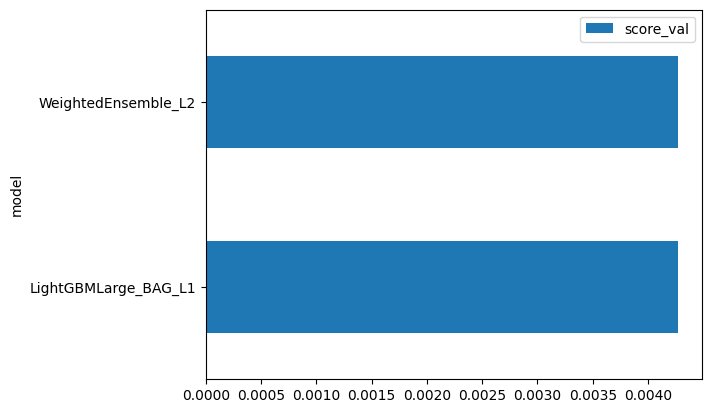

In [54]:
predictor_new_hpo.leaderboard(silent = True).plot(kind = 'barh',x = 'model',y = 'score_val')

In [55]:
# Remember to set all negative values to zero
count = predictor_new_hpo.predict(test)
for a,b in enumerate(count):
    if b < 0:
        count[a] = 0

count.describe()

count    6493.000000
mean      475.957185
std       174.936415
min         5.000000
25%       368.000000
50%       488.000000
75%       611.000000
max       884.000000
Name: count, dtype: float64

In [57]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = count
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [58]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 152k/152k [00:00<00:00, 459kB/s]
Successfully submitted to Bike Sharing Demand

In [59]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-06-27 16:02:32  new features with hyperparameters  complete  2.08165      2.08165       
submission_new_features.csv  2024-06-27 15:51:18  new features                       complete  1.84672      1.84672       
submission.csv               2024-06-27 15:16:50  first raw submission               complete  1.80885      1.80885       


#### New Score of `2.08165`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

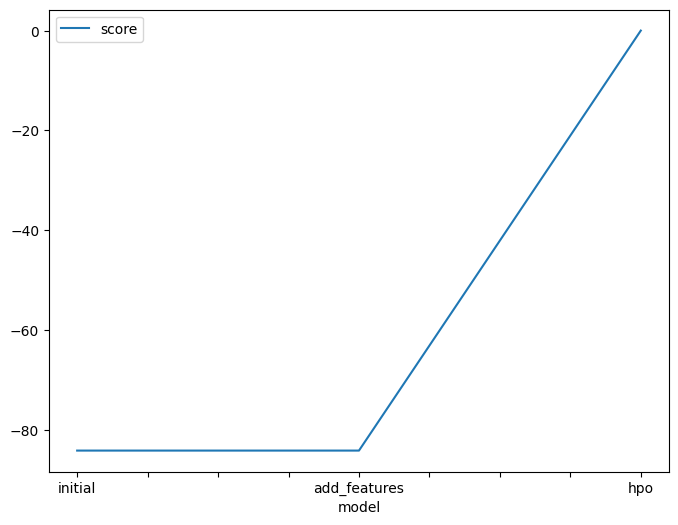

In [63]:
#Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-84.146423, -84.146423,0.004646]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('/kaggle/working/model_train_score.png')

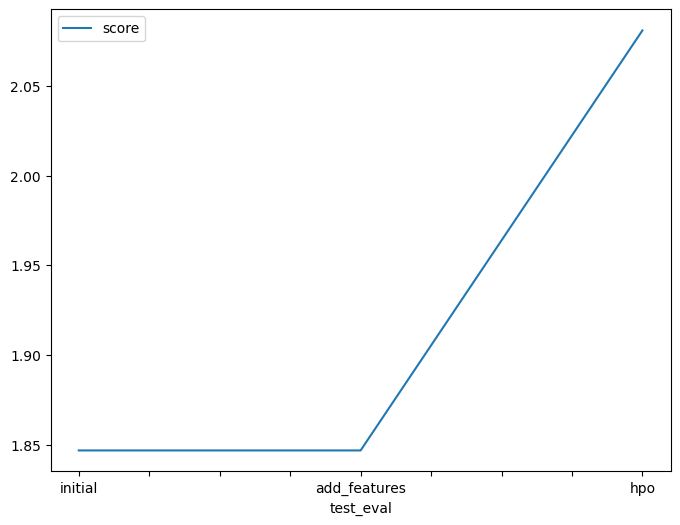

In [64]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.84672,1.84672, 2.08108]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('/kaggle/working/model_test_score.png')

### Hyperparameter table

In [62]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [-84.146423,-84.146423, -101.588176],
    "hpo2": [-84.146423,-84.146423, -101.588176],
    "hpo3": [0.004646,0.004646,0.004646],
    "score": [1.84672,1.84672, 2.08108]
})

,model,hpo1,hpo2,hpo3,score
0,initial,-84.146423,-84.146423,0.004646,1.84672
1,add_features,-84.146423,-84.146423,0.004646,1.84672
2,hpo,-101.588176,-101.588176,0.004646,2.08108
